<h1 style="font-size:3rem;color:maroon;"> Predicting Air Pollution Level using Machine Learning</h1>

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting air pollution level in an area in Eindhoven in the upcoming week.

We're going to take the following approach:
1. Problem definition
2. Data
3. Features
4. Data Exploration & Visualization
5. Data Preparation
6. Modelling

<h2><font color=slateblue> 1. Problem Definition </font></h2>

In a statement,
> Given historical pollution data, weather data and people going through an area, can we predict air pollution level in an area in Eindhoven in the upcoming week?

<h2><font color=slateblue> 2. Data </font></h2>

The data is provided by TNO and Zicht op Data.

<h2><font color=slateblue> 3. Features </font></h2>

This is where you'll get different information about each of the features in our data.

We have three separate datasets for the period between 25-09-2021 and 30-12-2021:

**Air pollution**
* date: date in ymd_hms
* PC4: postcode
* pm2.5: particulate matter <2.5um in ug/m3
* pm10: particulate matter <10um in ug/m3
* no2: nitrogen dioxide in ug/m3
* no: nitrogen oxide in ug/m3
* so2: sulphur dioxide in ug/m3


**Meteo**
* date: date in ymd_hms
* PC4: postcode
* wd: wind direction in degrees 0-360
* ws: wind speed in m/s
* blh: boundary layer height in metres
* tcc: total cloud cover in oktas (0-9)
* ssrd: solar surface radiation downwards in W/m2 

(see https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels?tab=overview for more information)

**Zichtop**
* PC4: postcode
* date: date in ymd_hms
* pop_tot: total number of people in PC4 for each time step
* m00_30: number of people who have been there for up to 30 minutes
* m30_60: number of people who have been there for 30 and 60 minutes
* H1_2: number of people who have been there for 1 and 2 hours
* H2_4: number of people who have been there for 2 and 4 hours
* H4_8: number of people who have been there for 4 and 8 hours
* H8_16: number of people who have been there for 8 and 16 hours
* H16plus: number of people who have been there for over 16 hours

<h2><font color=slateblue> 4. Data Exploration & Visualization </font></h2>

In [2]:
import pandas as pd

df_meteo = pd.read_csv("data/meteo.csv")
df_air_pollution = pd.read_csv("data/air_pollution.csv")
df_meteo.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
207797,2021-09-21 05:00:00,5645,25.458265,1.601877,103.734428,0.766150,0.000000
75698,2021-08-23 02:00:00,5622,84.721992,3.331810,371.126495,0.985808,0.000000
250376,2021-08-01 08:00:00,5654,209.580292,3.996043,587.692261,0.698632,207.026962
35498,2021-01-20 02:00:00,5615,243.327713,7.117206,778.877747,0.994513,0.000000
278047,2021-09-28 07:00:00,5657,251.226913,3.591289,282.744781,0.848401,77.945087
221232,2021-04-04 00:00:00,5651,119.200661,1.921703,398.394745,0.904513,0.000000
287392,2021-10-22 16:00:00,5658,154.859436,5.031766,812.648071,0.979114,31.122107
185949,2021-03-24 21:00:00,5643,101.532028,1.860121,47.438255,0.975113,0.000000
96103,2021-12-21 07:00:00,5624,7.439182,2.023391,96.763725,0.377016,0.000000
156025,2021-10-24 01:00:00,5632,284.274719,2.931925,202.667114,0.648251,0.000000


In [3]:
df_air_pollution.sample(10)

,date,PC4,pm10,pm2.5,no2,no,so2
57840,2021-12-06 23:00:00,5612,8.483089,15.651847,19.686987,0.113990,2.761490
61417,2021-12-11 00:00:00,5633,32.583470,54.141730,48.472228,26.223612,2.433156
7354,2021-11-02 10:00:00,5615,8.989580,6.271042,26.083103,17.065009,1.333816
16246,2021-10-01 22:00:00,5624,6.637281,3.367316,13.318879,8.713948,1.275389
34780,2021-11-06 04:00:00,5643,8.831894,7.448514,24.666927,16.138468,4.820728
40409,2021-10-03 17:00:00,5651,6.870955,3.233395,23.890045,15.630189,2.178888
21205,2021-10-07 13:00:00,5627,13.140131,4.056572,4.770632,3.121211,0.447999
43598,2021-10-02 14:00:00,5653,3.585768,1.480677,5.092371,3.331711,0.258845
26190,2021-10-14 06:00:00,5631,25.222099,13.545953,37.160099,24.312193,5.958396
52455,2021-11-05 15:00:00,5658,9.505347,3.221734,25.304719,16.555747,2.292779


In [4]:
df_meteo['PC4'].unique()

array([5611, 5612, 5613, 5614, 5615, 5616, 5617, 5621, 5622, 5623, 5624,
       5625, 5626, 5627, 5628, 5629, 5631, 5632, 5633, 5641, 5642, 5643,
       5644, 5645, 5646, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658])

In [5]:
df_meteo.shape

(289080, 7)

In [6]:
df_meteo['date'] = pd.to_datetime(df_meteo['date'])
df_air_pollution['date'] = pd.to_datetime(df_air_pollution['date'])
df_meteo.dtypes

date    datetime64[ns]
PC4              int64
wd             float64
ws             float64
blh            float64
tcc            float64
ssrd           float64
dtype: object

In [7]:
postalcode = df_meteo[df_meteo['PC4'] == 5611]
postalcode.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd
437,2021-01-19 05:00:00,5611,237.997589,8.133092,888.085754,1.000000,0.000000
7165,2021-10-26 13:00:00,5611,226.190598,5.856820,849.826904,0.993395,179.135156
4384,2021-07-02 16:00:00,5611,186.099594,2.330217,975.677307,0.993743,290.939288
7958,2021-11-28 14:00:00,5611,134.716751,3.011830,490.563507,0.996273,79.113151
3051,2021-05-08 03:00:00,5611,303.777374,3.236578,150.801651,0.892776,0.000000
3296,2021-05-18 08:00:00,5611,189.526108,2.986170,777.530518,0.554484,355.160833
7673,2021-11-16 17:00:00,5611,196.470367,1.629414,398.958527,0.994142,0.000000
8104,2021-12-04 16:00:00,5611,178.195923,4.742207,843.872559,0.796303,1.301730
7428,2021-11-06 12:00:00,5611,234.828140,5.556890,663.128967,0.998936,171.351771
8600,2021-12-25 08:00:00,5611,32.758427,5.188618,428.341492,0.996369,0.278884


<AxesSubplot:xlabel='ws', ylabel='ssrd'>

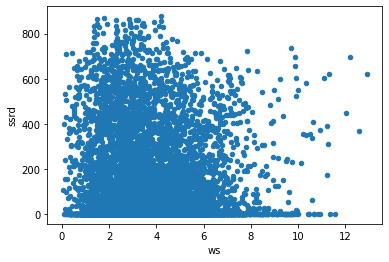

In [8]:
postalcode.plot.scatter(x = 'ws', y = 'ssrd')

<AxesSubplot:xlabel='date', ylabel='ws'>

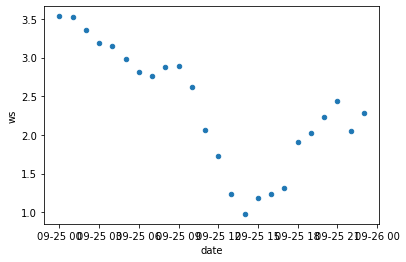

In [9]:
one_day = postalcode[postalcode['date']. dt. strftime('%Y-%m-%d')=='2021-09-25']

one_day.plot.scatter(x = 'date', y = 'ws')

In [60]:
df_meteo_air_pollution = pd.merge(df_meteo, df_air_pollution[['PC4','date', 'pm10', 'pm2.5', 'no2',	'no', 'so2']], on=['PC4', 'date'])
df_meteo_air_pollution.sample(10)

,date,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2
837,2021-10-29 21:00:00,5611,240.877319,3.826397,605.235291,0.934010,0.000000,9.624337,6.290991,14.542917,9.514781,0.745128
10611,2021-11-18 03:00:00,5615,213.800385,3.371605,211.920059,0.976417,0.000000,15.306426,11.019080,43.485148,28.450389,4.386094
14047,2021-09-28 07:00:00,5617,250.758911,3.532178,282.175934,0.855269,78.197908,20.812969,9.886884,29.414860,19.244829,11.783184
66132,2021-11-03 12:00:00,5654,29.853991,1.156983,156.026581,1.000000,162.919722,15.813553,11.526285,37.119529,24.285650,8.692257
25180,2021-12-13 03:00:00,5624,229.701050,3.655012,403.047272,0.971959,0.000000,22.412230,36.304370,13.674697,0.153051,2.463128
2327,2021-12-30 22:00:00,5611,216.459579,6.565564,1042.601074,0.878680,0.000000,9.824935,12.711650,10.586017,0.042743,1.821605
30567,2021-10-07 15:00:00,5627,345.484467,1.390393,608.872559,0.645403,189.497274,17.595634,8.134522,15.884232,10.392343,0.797522
37257,2021-09-25 09:00:00,5631,242.356216,2.894366,299.218628,0.758804,135.367839,16.967850,8.312002,12.767174,8.352991,3.721224
29560,2021-12-01 15:00:00,5626,174.481033,7.076050,1107.685181,0.994080,38.720256,10.336342,8.912744,15.149107,1.072133,1.845767
32862,2021-10-06 06:00:00,5628,232.294189,7.456973,969.732056,0.998741,0.105855,3.855511,3.015007,8.069043,5.279214,0.896676


In [14]:
df_meteo_air_pollution.corr()

,PC4,wd,ws,blh,tcc,ssrd,pm10,pm2.5,no2,no,so2
PC4,1.000000,0.000076,-0.001509,-0.000123,-0.000361,0.000312,-0.022215,-0.015463,-0.032789,-0.024208,-0.000279
wd,0.000076,1.000000,0.230591,0.103630,0.112913,0.016625,-0.187737,-0.136112,-0.118636,-0.107638,-0.093911
ws,-0.001509,0.230591,1.000000,0.784148,0.155494,0.050453,-0.553370,-0.367544,-0.565810,-0.470274,-0.273122
blh,-0.000123,0.103630,0.784148,1.000000,0.163201,0.383340,-0.526747,-0.413403,-0.586969,-0.430816,-0.330779
tcc,-0.000361,0.112913,0.155494,0.163201,1.000000,-0.095528,-0.059323,0.048579,-0.105692,-0.128986,-0.259867
ssrd,0.000312,0.016625,0.050453,0.383340,-0.095528,1.000000,-0.111372,-0.180928,-0.283996,-0.134422,-0.023144
pm10,-0.022215,-0.187737,-0.553370,-0.526747,-0.059323,-0.111372,1.000000,0.842424,0.443763,0.419273,0.354938
pm2.5,-0.015463,-0.136112,-0.367544,-0.413403,0.048579,-0.180928,0.842424,1.000000,0.252095,0.178604,0.162552
no2,-0.032789,-0.118636,-0.565810,-0.586969,-0.105692,-0.283996,0.443763,0.252095,1.000000,0.674611,0.362617
no,-0.024208,-0.107638,-0.470274,-0.430816,-0.128986,-0.134422,0.419273,0.178604,0.674611,1.000000,0.309740


<AxesSubplot:xlabel='date'>

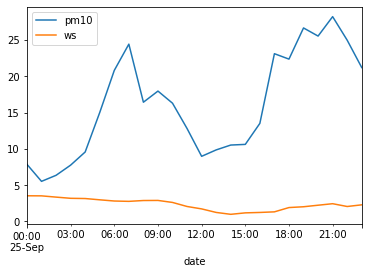

In [65]:
one_day_df_meteo_air_pollution = pd.merge(one_day, df_air_pollution[['PC4','date', 'pm10', 'pm2.5', 'no2',	'no', 'so2']], on=['PC4', 'date'])
one_day_df_meteo_air_pollution.plot(x='date', y=['pm10','ws'])

<h2><font color=slateblue> 5. Data Preparation </font></h2>

<h2><font color=slateblue> 6. Modelling </font></h2>